In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
train=pd.read_csv("./train.csv")

In [246]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Explore data : 

In [247]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S


In [249]:
train.shape

(891, 12)

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [252]:
null_features=train.isnull().sum()
null_features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
null_features[null_features>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

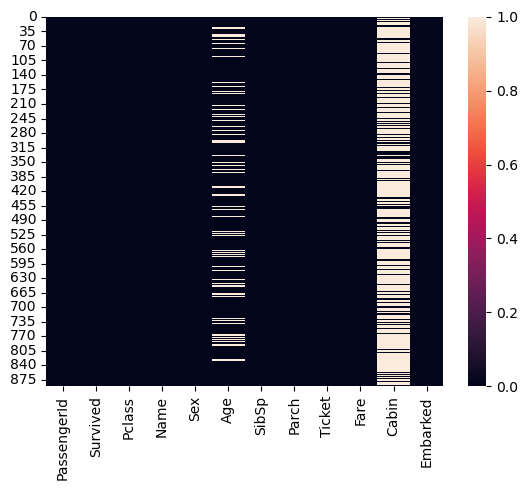

In [254]:
sns.heatmap(train.isnull())

# 2- CLEAN DATA 

In [255]:
#drop useless columns : 
train.drop(["Cabin","Name","Ticket","Embarked","Fare"],axis=1,inplace=True)

In [256]:
#fill the null and important columns :
train.Age=train.Age.fillna(train.Age.median())

In [257]:
#drop null columns :
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<Axes: >

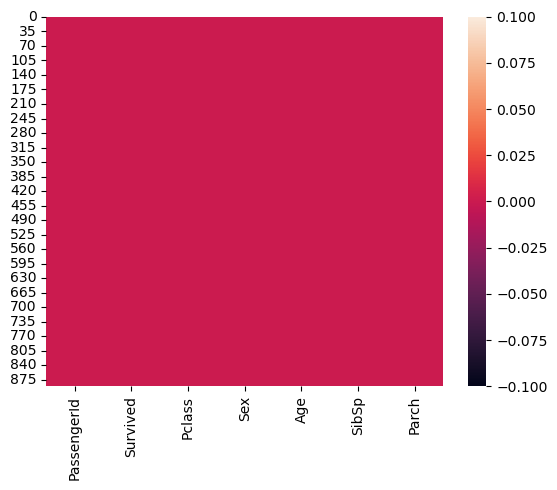

In [258]:
sns.heatmap(train.isnull())

In [182]:
# We have to do the same cleaning steps to test dataset ,
#we can make a function for both training and testing set but ill go for the classic way

# 3- Data Analysis : 

In [259]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


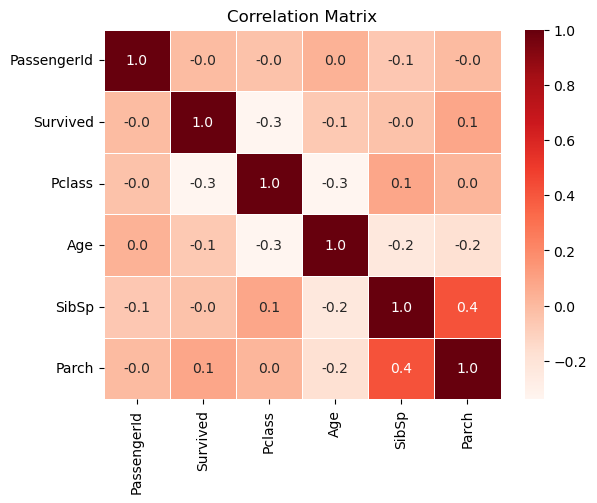

In [260]:
sns.heatmap(train.select_dtypes(exclude=object).corr(), cmap='Reds', annot=True,fmt=".1f",linewidth=.5)
plt.title('Correlation Matrix');

In [261]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [262]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

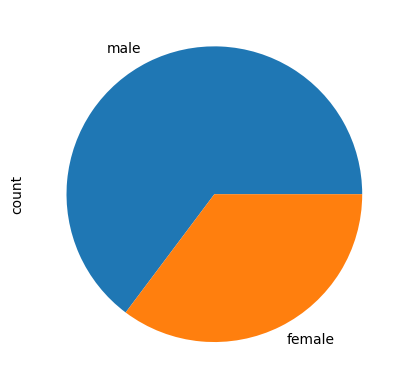

In [263]:
train.Sex.value_counts().plot.pie()

In [264]:
import plotly.express as px
px.histogram(train, x='Sex', color='Survived', title='Sex vs Survived')

In [265]:
px.histogram(train,x="Pclass",color="Survived")

<Axes: xlabel='Age', ylabel='Count'>

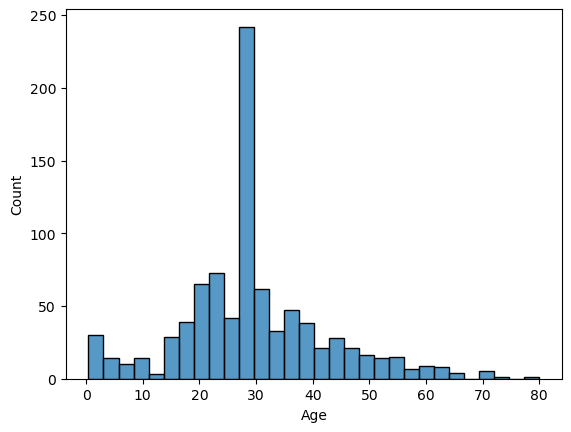

In [266]:
sns.histplot(train.Age)

In [193]:
#Transform data : 
#1 method 

#train.Sex=pd.get_dummies(train.Sex)
#train

In [194]:
#convert categorical featues into numeric 
#2eme method

# Define a mapping dictionary with a default value
#sex_mapping = {'male': 0, 'female': 1}
# Use map with the default value for unknown cases
#train['Sex'] = train['Sex'].map(sex_mapping).fillna(-1)  # Use -1 as a default value, you can choose another value if needed
#test['Sex'] = test['Sex'].map(sex_mapping).fillna(-1) 

In [267]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


In [268]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,28.0,1,2
889,890,1,1,0,26.0,0,0


# 4- Create the model : 

In [269]:
from sklearn.model_selection import train_test_split

X_train=train.drop(["Survived"],axis=1)
Y_train=train["Survived"]


In [270]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,0,22.0,1,0
1,2,1,1,38.0,1,0
2,3,3,1,26.0,0,0
3,4,1,1,35.0,1,0
4,5,3,0,35.0,0,0
...,...,...,...,...,...,...
886,887,2,0,27.0,0,0
887,888,1,1,19.0,0,0
888,889,3,1,28.0,1,2
889,890,1,0,26.0,0,0


In [271]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [272]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,train_size=0.8,random_state=42)

In [273]:
x_train.shape

(712, 6)

In [274]:
x_test.shape

(179, 6)

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
#train the model 
model.fit(x_train,y_train)
# Make predictions on the test set
y_pred = model.predict(x_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 78.77%


/home/gouerch/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [276]:
import pandas as pd
path="./test.csv"
test1=pd.read_csv(path)
test1['Sex'] = test1['Sex'].map({'male': 0, 'female': 1})
#drop useless columns : 
test1.drop(["Cabin","Name","Ticket","Embarked","Fare"],axis=1,inplace=True)
#fill the null and important columns :
test1.Age=test.Age.fillna(test1.Age.median())
#drop null columns :
test1.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0
414,1306,1,1,39.0,0,0
415,1307,3,0,38.5,0,0
416,1308,3,0,27.0,0,0


In [277]:
predictions=model.predict(test1)

In [278]:
passenger_ids = test1['PassengerId'].to_numpy()

In [279]:
sub_df = pd.DataFrame({'PassengerId':passenger_ids, 'Survived':predictions})
sub_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [280]:
sub_df.to_csv("submission.csv",index=False)

In [281]:
ls

gender_submission.csv  test.csv   Untitled1.ipynb
submission.csv         train.csv  Untitled.ipynb


In [282]:
subs=pd.read_csv("./submission.csv")
subs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
